In [15]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
base = pd.read_csv("abalone.data")

In [3]:
base

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
base.columns = [
    'sexo',
    'comprimento',
    'diâmetro',
    'altura',
    'peso total',
    'peso descascado',
    'peso das víceras',
    'peso da concha',
    'anéis'
]


In [5]:
base

,sexo,comprimento,diâmetro,altura,peso total,peso descascado,peso das víceras,peso da concha,anéis
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
X = base.drop(columns= "sexo")
y = base['sexo']

In [7]:
## separação dos dados em dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [8]:
k_min = 3
k_max = 13
## o passo é o valor somado para produzir o próximo elemento da
## sequência produzida pelo range
passo = 2

knn_modelos = [KNeighborsRegressor(n_neighbors=k)
               for k in range(k_min, k_max +passo, passo)]

In [9]:
# Transformando variáveis categóricas em números
le = LabelEncoder()
base['sexo'] = le.fit_transform(base['sexo'])


In [10]:
# Isolando a variável de interesse
X = base.drop('anéis', axis=1)
y = base['anéis']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #separando treino e teste


In [12]:
# Valores de K e o peso
k_min = 3
k_max = 13
passo = 2

In [13]:
# criando modelos para cada valor de K 
knn_modelos = [KNeighborsRegressor(n_neighbors=k) for k in range(k_min, k_max + passo, passo)]



In [16]:
resultados = []

# Treinando e avaliando cada modelo
for modelo in knn_modelos:
    # Treinando o modelo
    modelo.fit(X_train, y_train)
    
    # Fazendo previsões no conjunto de teste
    y_pred = modelo.predict(X_test)
    
    # Calculando MAE e RMSE
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Salvando os resultados
    resultados.append({'k': modelo.n_neighbors, 'MAE': mae, 'RMSE': rmse})

    k       MAE      RMSE
0   3  1.637560  2.354173
1   5  1.561005  2.236421
2   7  1.535373  2.217811
3   9  1.552499  2.237610
4  11  1.555350  2.237392
5  13  1.552172  2.252966


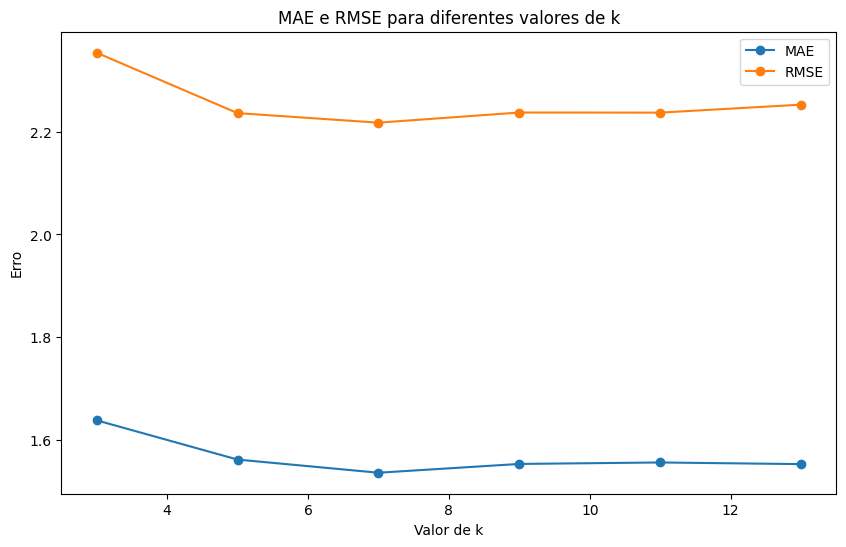

In [17]:
# Convertendo os resultados para um DataFrame para facilitar a visualização
resultados_df = pd.DataFrame(resultados)


print(resultados_df)

# Fazendo gráfico para melhor visualização
plt.figure(figsize=(10, 6))
plt.plot(resultados_df['k'], resultados_df['MAE'], marker='o', label='MAE')
plt.plot(resultados_df['k'], resultados_df['RMSE'], marker='o', label='RMSE')
plt.xlabel('Valor de k')
plt.ylabel('Erro')
plt.title('MAE e RMSE para diferentes valores de k')
plt.legend()
plt.show()



In [18]:
# Selecionando o valor de k com o menor MAE e RMSE
optimal_k = resultados_df.loc[resultados_df[['MAE', 'RMSE']].idxmin().min()]

print(f"O valor ótimo de k é {optimal_k['k']} com MAE={optimal_k['MAE']:.3f} e RMSE={optimal_k['RMSE']:.3f}")

O valor ótimo de k é 7.0 com MAE=1.535 e RMSE=2.218


### Conclusão

Ao observar a compraração dos resultados das métricas, podemos perceber que o valor de K com as menores métricas de erro é o 7.